# 머리말

# Imports & Utility functions

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
print(os.listdir('./input'))

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv') 
sub = pd.read_csv('./input/sample_submission.csv')

In [3]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
train.isnull().sum(), test.isnull().sum()

(id                                           0
 target                                       0
 comment_text                                 0
 severe_toxicity                              0
 obscene                                      0
 identity_attack                              0
 insult                                       0
 threat                                       0
 asian                                  1399744
 atheist                                1399744
 bisexual                               1399744
 black                                  1399744
 buddhist                               1399744
 christian                              1399744
 female                                 1399744
 heterosexual                           1399744
 hindu                                  1399744
 homosexual_gay_or_lesbian              1399744
 intellectual_or_learning_disability    1399744
 jewish                                 1399744
 latino                                 

In [5]:
# 댓글 길이
train['total_length'] = train['comment_text'].apply(len)

# 대문자 갯수
train['capitals'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))

# 대문자 갯수 / 댓글 길이
train['caps_vs_length'] = train.apply(lambda row: float(row['capitals'])/float(row['total_length']),axis=1)

In [6]:
# 느낌표 갯수
train['num_exclamation_marks'] = train['comment_text'].apply(lambda comment: comment.count('!'))

# 물음표 갯수
train['num_question_marks'] = train['comment_text'].apply(lambda comment: comment.count('?'))

# 문장 기호 갯수
train['num_punctuation'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '. , ; :'))

In [7]:


# 특수 문자 갯수
train['num_symbols'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&%$'))

# 단어 갯수
train['num_words'] = train['comment_text'].apply(lambda comment: len(comment.split()))

# 단어 갯수 중복 제거
train['num_unique_words'] = train['comment_text'].apply(lambda comment: len(set(w for w in comment.split())) )

# 한 번 나온 단어의 갯수 / 단어의 총 갯수
train['words_vs_unique'] = train['num_unique_words'] / train['num_words']

# 스마일 이모티콘 갯수
train['num_smilies'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';_')))

In [8]:
# 문장의 문법적 특징
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks','num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words','words_vs_unique', 'num_smilies', 'num_symbols')

In [9]:
# 독성의 분류
columns = ('target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit', 'identity_annotator_count', 'toxicity_annotator_count')

In [10]:
rows = [{c:train[f].corr(train[c]) for c in columns} for f in features]
train_correlations = pd.DataFrame(rows, index = features)

In [11]:
# 문장의 문법적 특징과 문장의 특성의 상관관계 
train_correlations

,disagree,funny,identity_annotator_count,identity_attack,insult,likes,obscene,sad,severe_toxicity,sexual_explicit,target,threat,toxicity_annotator_count,wow
total_length,0.017617,-0.084710,0.020840,0.053430,0.009085,0.060639,0.009823,-0.019940,0.007962,0.019882,0.006444,-0.013198,-0.030894,0.002572
capitals,0.003928,-0.039221,0.012405,0.050489,0.026358,0.018707,0.027995,-0.005448,0.025127,0.014144,0.026120,0.000721,-0.009082,0.009687
caps_vs_length,-0.021716,0.021263,-0.005510,-0.008477,-0.006029,-0.038470,0.017088,0.002848,0.010594,-0.003575,-0.005344,0.000822,0.015381,-0.000603
num_exclamation_marks,-0.009384,0.007073,0.000869,0.017085,0.052533,-0.007866,0.056108,0.005158,0.035388,0.019437,0.055152,0.021267,0.024115,0.002225
num_question_marks,-0.002180,-0.009290,0.006305,0.028554,0.014366,-0.002731,0.019233,0.002023,0.011662,0.015987,0.019308,-0.000430,-0.003307,0.001263
num_punctuation,0.014357,-0.084781,0.020594,0.050268,0.012447,0.057772,0.014969,-0.020198,0.009999,0.021595,0.010037,-0.009723,-0.029587,0.002341
num_words,0.016121,-0.084398,0.020595,0.050527,0.011975,0.059481,0.014536,-0.019412,0.009696,0.021525,0.009579,-0.009893,-0.029856,0.002714
num_unique_words,0.019634,-0.085764,0.020787,0.053659,0.019494,0.063874,0.017918,-0.018110,0.011900,0.022816,0.016702,-0.008946,-0.029814,0.003490
words_vs_unique,-0.020712,0.079045,-0.019749,-0.048941,0.001135,-0.060162,-0.003007,0.016223,-0.005329,-0.015748,0.001172,0.009367,0.027853,-0.004150
num_smilies,-0.009985,0.009283,-0.000403,-0.007588,-0.009221,-0.015311,-0.001610,-0.002200,-0.003984,-0.000945,-0.009737,-0.002273,-0.002804,-0.002563


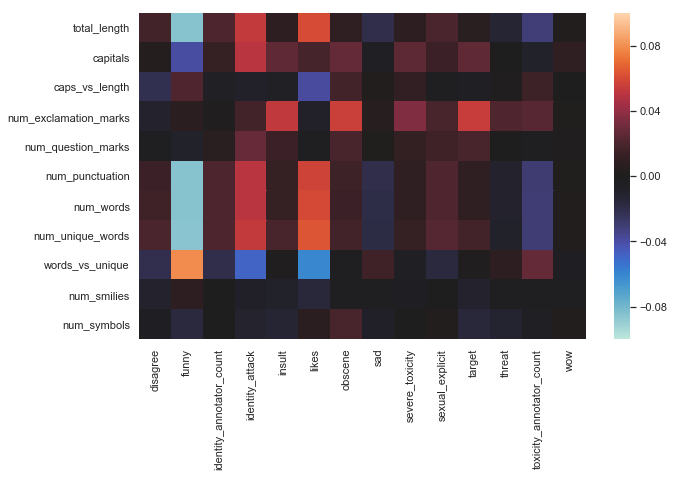

In [12]:
# 상관관계를 히트맵으로 나타내기 -> 알아보기 쉬움

plt.figure(figsize = (10, 6))
sns.set(font_scale = 1 )
ax = sns.heatmap(train_correlations, vmin = -0.1, vmax = 0.1, center = 0.0)

In [13]:
# 특성 중에서 NA값이 있는 행은 삭제하고, 독성과 특성만 담긴 새로운 리스트 생성

demographics = train.loc[:, ['target'] + list(train)[slice(8,32)]].dropna()

In [21]:
demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()

asian                                  10975
atheist                                 2253
bisexual                                3330
black                                  19563
buddhist                                1366
christian                              61360
female                                 73690
heterosexual                            3453
hindu                                   1557
homosexual_gay_or_lesbian              15307
intellectual_or_learning_disability     2648
jewish                                 10905
latino                                  6936
male                                   80179
muslim                                 26650
other_disability                        3545
other_gender                            2723
other_race_or_ethnicity                18867
other_religion                         16732
other_sexual_orientation                4508
physical_disability                     3227
psychiatric_or_mental_illness          10665
transgende

In [27]:
# (작성자 특징 * 독성)의 합 / (특성값이 0 이상인 데이터의 갯수)  == (작성자 특징*독성)값의 평균

weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0], axis = "index").sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()

# 정렬
weighted_toxic = weighted_toxic.sort_values(ascending = False)

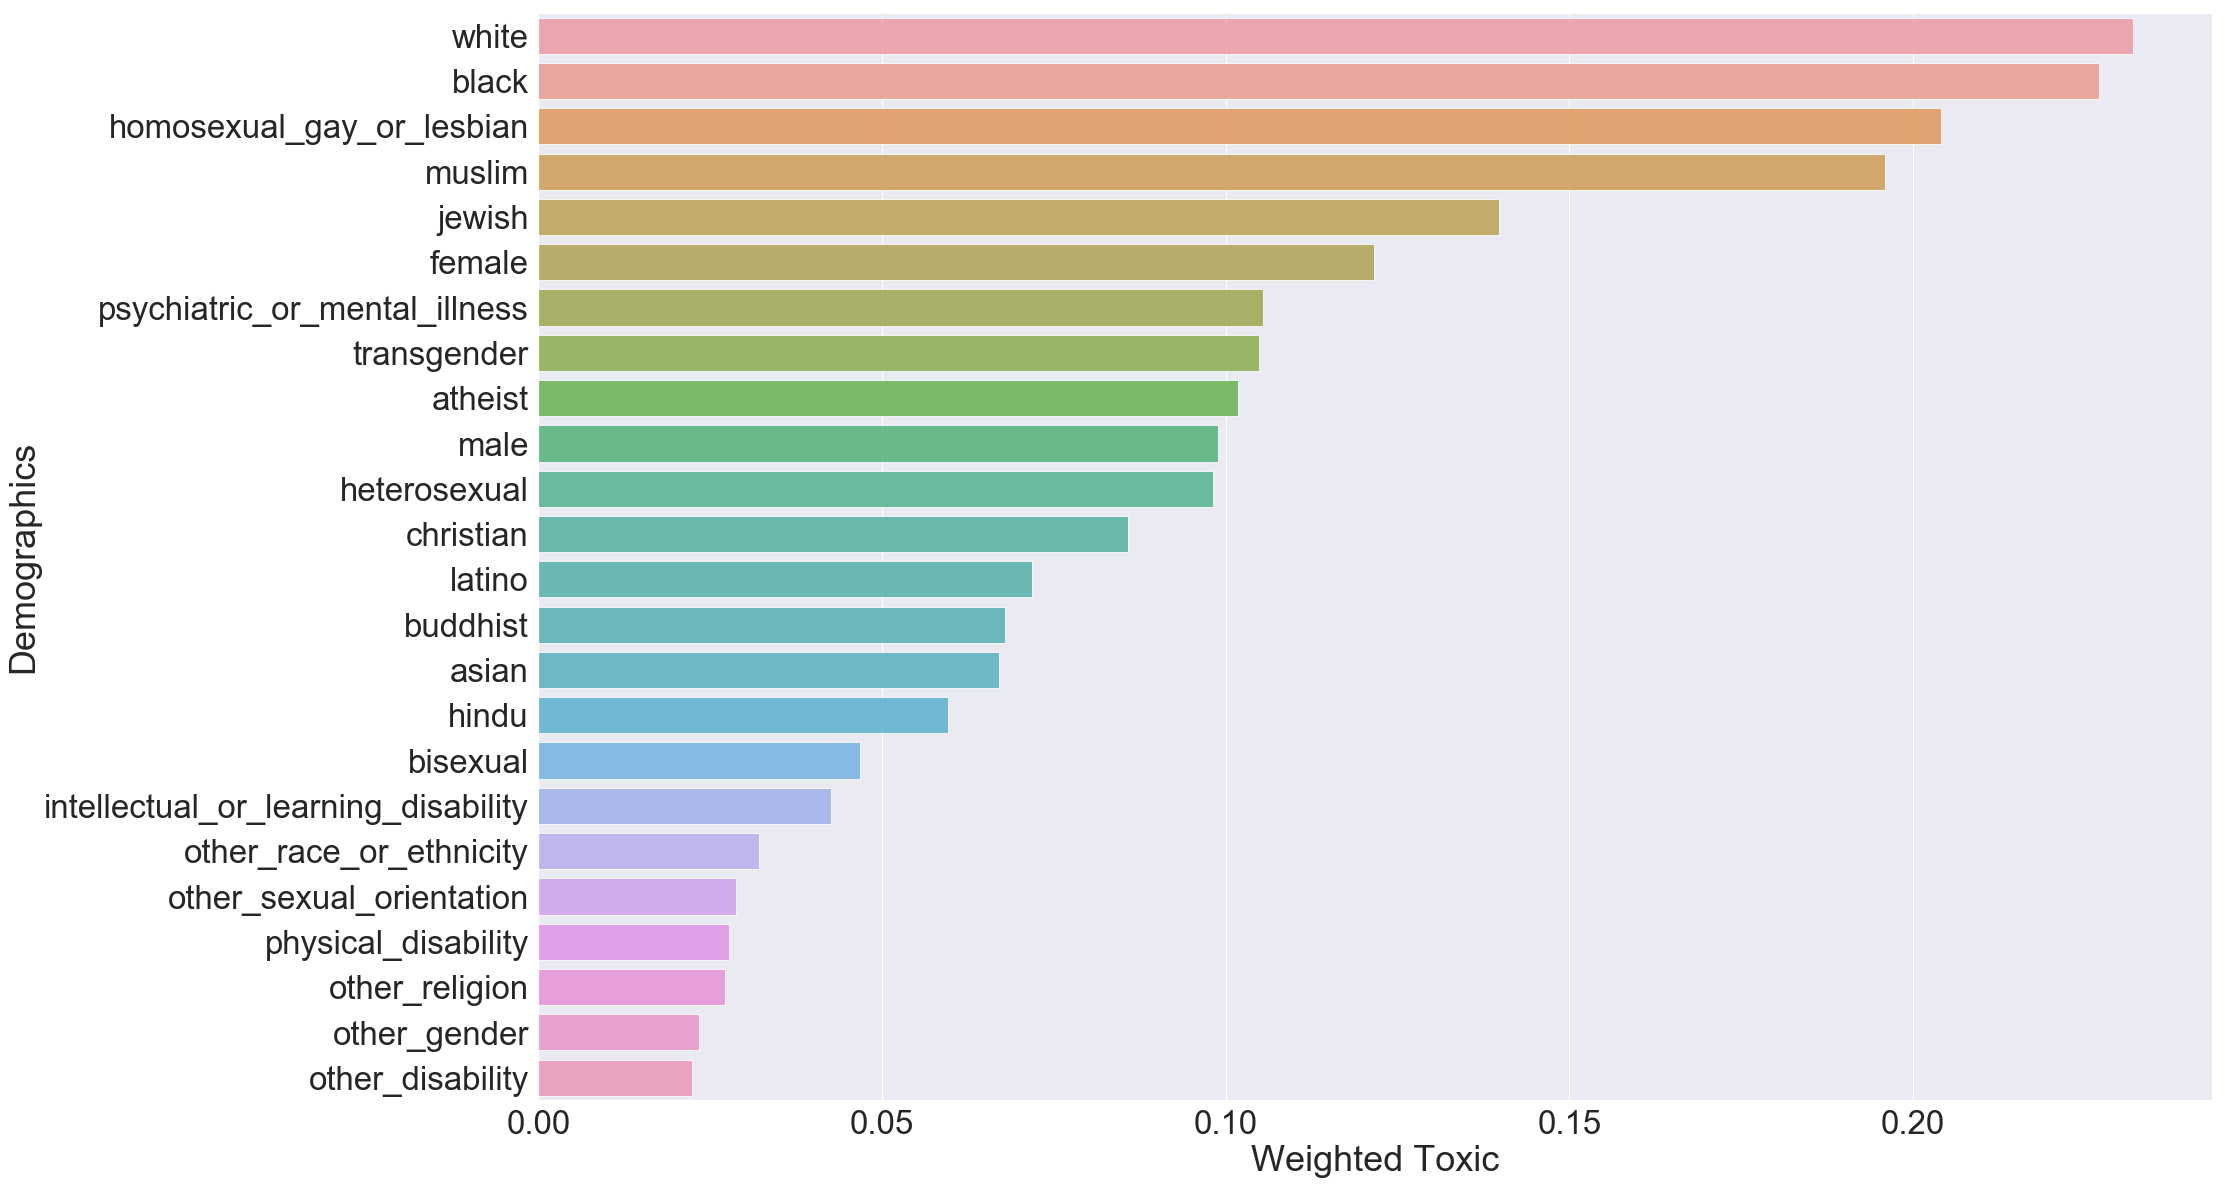

In [28]:
plt.figure(figsize=(30, 20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index, alpha=0.8)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxic')
plt.show()

white, black, homosexual, gay, lesbian 으로 추측되는 사람들이 독성을 담은 댓글을 많이 남기는 경향인 것을 알아낼 수 있다.

In [31]:
# 문장의 독성과 댓글 작성자의 정체성의 상관관계

identities = tuple(train.iloc[:, 8:32])
rows = [{c:train[f].corr(train[c]) for c in columns} for f in identities]
poptoxicity_correlations = pd.DataFrame(rows, index = identities)

In [32]:
poptoxicity_correlations

,disagree,funny,identity_annotator_count,identity_attack,insult,likes,obscene,sad,severe_toxicity,sexual_explicit,target,threat,toxicity_annotator_count,wow
asian,0.007868,-0.000409,0.021327,0.041203,-0.000664,-0.003144,-0.004047,0.001051,0.005371,-0.013710,0.007205,-0.002817,0.001216,0.010691
atheist,0.001031,-0.002847,0.023635,0.031167,0.005152,-0.002436,-0.000122,0.000051,0.005047,-0.004954,0.010625,0.000781,-0.000433,-0.002600
bisexual,-0.004104,-0.003230,0.015360,0.047476,0.006283,0.009078,0.005323,-0.002987,0.009279,0.024218,0.021057,-0.001796,-0.000380,-0.000367
black,-0.000631,-0.020852,0.018075,0.314422,0.098186,-0.012769,0.026267,0.004480,0.094418,-0.006407,0.167224,0.048630,0.035702,0.001483
buddhist,-0.001719,-0.002802,0.010600,0.024143,-0.002909,-0.000621,-0.001751,-0.001348,0.004260,-0.004397,0.004613,0.002542,-0.002119,-0.001222
christian,-0.020644,-0.008460,0.018038,0.093885,-0.030669,0.021608,-0.025650,-0.015212,-0.000874,0.008710,-0.006776,-0.014324,-0.015846,-0.013146
female,0.008464,-0.012743,0.009830,0.052299,0.037995,0.036137,0.036250,0.005052,0.032653,0.153735,0.062904,0.023384,0.007588,0.008052
heterosexual,-0.002821,-0.002225,0.010674,0.073282,0.012613,0.006148,0.008396,-0.001339,0.018239,0.066624,0.038193,-0.003600,0.003018,-0.001381
hindu,0.002689,-0.002369,0.014825,0.022695,-0.001895,0.002924,-0.002221,-0.001025,0.003839,-0.005251,0.003607,0.001549,-0.001248,-0.000161
homosexual_gay_or_lesbian,-0.002378,-0.003616,0.020577,0.249880,0.061920,0.012015,0.026097,0.003452,0.064122,0.099424,0.131110,0.016785,0.019139,-0.001935


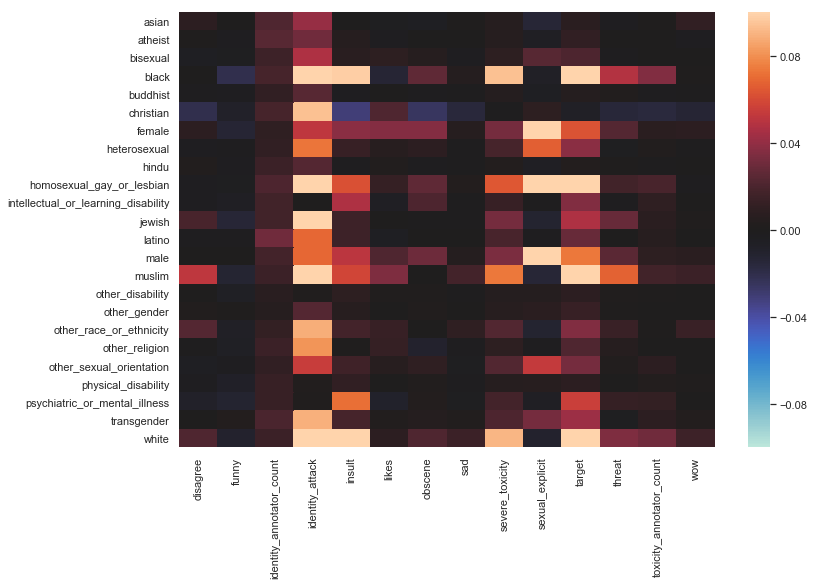

In [33]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
ax = sns.heatmap(poptoxicity_correlations, vmin = -0.1, vmax = 0.1, center = 0.0)

In [34]:
# 댓글작성 날짜와 독성정보를 함께 담은 withdate 리스트
withdate = train.loc[:, ['created_date', 'target'] + list(train)[slice(8, 32)]].dropna()

In [35]:
# 작성자 정체성 / 작성자 정체성의 합 = 작성자 정체성 비율
raceweighted = withdate.iloc[:, 2:]/withdate.iloc[:, 2:].sum()

In [45]:
# 작성자 정체성 비율 x 독성
race_target_weighted = raceweighted.multiply(withdate.iloc[:, 1], axis = "index")

In [50]:
# 작성 날짜 열 추가
race_target_weighted['created_date'] = pd.to_datetime(withdate['created_date']).values.astype('datetime64[M]')

In [53]:
# 날짜 별 작성자 정체성에 따른 독성
weighted_demo = race_target_weighted.groupby(['created_date']).sum().sort_index()

In [54]:
weighted_demo.head(10)

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white
created_date,,,,,,,,,,,,,,,,,,,,,
2015-09-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-01,0.000031,0.000000,0.000000,0.000031,0.000000,0.000025,0.000036,0.000000,0.000000,0.000043,...,0.000046,0.000110,0.000000,0.000042,0.000022,0.000000,0.000000,0.000359,0.000108,0.000091
2016-02-01,0.000126,0.002187,0.001165,0.000797,0.000857,0.000277,0.000252,0.000621,0.000000,0.000707,...,0.000220,0.000138,0.000182,0.000187,0.000423,0.000127,0.000036,0.000461,0.000132,0.000431
2016-03-01,0.000678,0.001040,0.002598,0.001868,0.000504,0.000687,0.001395,0.003061,0.001649,0.002662,...,0.000845,0.000911,0.000755,0.001059,0.000902,0.001629,0.002704,0.002695,0.001632,0.002480
2016-04-01,0.000695,0.002315,0.003293,0.002660,0.000861,0.001294,0.001982,0.004093,0.000996,0.005421,...,0.000839,0.002201,0.003594,0.001500,0.000979,0.003779,0.002582,0.003924,0.004424,0.002298
2016-05-01,0.000961,0.001313,0.005302,0.003140,0.000502,0.000474,0.002321,0.003689,0.000292,0.002596,...,0.001147,0.002326,0.001284,0.001779,0.000705,0.003551,0.001295,0.003340,0.012820,0.002385


무언가 특정 사건이 일어난 날, 특정 정체성을 가진 사람이 독성이 담긴 댓글을 쓸 가능성도 고려하기 위해서 분석한 데이터

In [66]:
import plotly
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='13217', api_key='FG6itEaCMouvPJVR7DlI')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [68]:
weighted_demo[['white', 'asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity']].iplot(title = 'Time Series Toxicity & Race', filename = 'Time Series Toxicity & Race')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [69]:
weighted_demo[['atheist', 'buddhist', 'christian', 'hindu', 'muslim', 'other_religion']].iplot(title = 'Time Series Toxicity & Religion', filename='Time Series Toxicity & Religion')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [70]:
weighted_demo[['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']].iplot(title = 'Time Series Toxicity & Sexual Orientation', filename='Time Series Toxicity & Sexual Orientation')


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [71]:
weighted_demo[['male', 'female', 'transgender', 'other_gender']].iplot(title = 'Time Series Toxicity & Gender', filename='Time Series Toxicity & Gender')


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [73]:
weighted_demo[['physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 'other_disability']].iplot(title = 'Time Series Toxicity & Disability', filename='Time Series Toxicity & Disability')


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### 날짜별 독성 댓글 작성 경향

In [74]:
# 독성이 0.5를 넘는 댓글의 작성날짜, 독성, 댓글내용을 담은 리스트

alldate_toxicity = train[train['target'] >= 0.5].loc[:,['created_date', 'target', 'comment_text']].dropna()

In [76]:
# 날짜를 년도, 월, 일만 보이도록 수정

alldate_toxicity['created_date'] = pd.to_datetime(alldate_toxicity['created_date']).values.astype('datetime64[M]')

In [91]:
# 2017/01/01 데이터 추출

jan_2017_toxicity = alldate_toxicity[alldate_toxicity['created_date'] == '2017-01-01']

In [84]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suhyoun/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [87]:
def check_frequency(data = alldate_toxicity['comment_text'], n = 20):
    stop = stopwords.words('english')
    data = data.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    data = data.str.replace('[^\w\s]', '')
    data = data.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    freq = pd.Series('  '.join(data).split()).value_counts()[:n]
    return freq

In [88]:
# 2017/01/01 이외의 날에 나온 독성 댓글 들 중 가장 많이 나온 단어

top_10_toxicity_othertime = check_frequency(data = alldate_toxicity[alldate_toxicity['created_date'] != '2017-01-01']['comment_text'], n=10)

In [89]:
top_10_toxicity_othertime

trump     27376
people    25998
like      23612
would     18293
one       17365
dont      17221
get       15701
stupid    13405
us        12310
think     10975
dtype: int64

In [92]:
# 2017/01/01 날에 나온 독성 댓글 들 중 가장 많이 나온 단어

top_10_toxicity_jan_2017 = check_frequency(data = jan_2017_toxicity['comment_text'], n = 10)

In [93]:
top_10_toxicity_jan_2017

trump     2662
people    1969
like      1874
dont      1344
one       1331
would     1315
us        1292
get       1181
stupid    1021
think      864
dtype: int64

In [94]:
top_10_toxicity_jan_2017.index.difference(top_10_toxicity_othertime.index)

Index([], dtype='object')

2017 년 1월에 독성 댓글에 나온 단어와 그 외의 달의 독성 댓글에 나온 단어가 정확히 일치함을 알 수 있다.

In [113]:
#  독성 단어 top 10 의 갯수 /독성 댓글에 나타난 모든 단어의 갯수 == 단어들 중 독성 단어 top 10의 비율

percent_toxicity_othertime = top_10_toxicity_othertime/alldate_toxicity[alldate_toxicity['created_date'] != '2017-01-01']['comment_text'].str.split().str.len().sum()

In [114]:
percent_toxicity_othertime

trump     0.004231
people    0.004018
like      0.003650
would     0.002828
one       0.002684
dont      0.002662
get       0.002427
stupid    0.002072
us        0.001903
think     0.001696
dtype: float64

In [115]:
#  2017-01-01 독성 단어 top 10 의 갯수 /독성 댓글에 나타난 모든 단어의 갯수 == 단어들 중 독성 단어 top 10의 비율

percent_toxicity_jan_2017 = top_10_toxicity_jan_2017/jan_2017_toxicity['comment_text'].str.split().str.len().sum()

In [116]:
percent_toxicity_jan_2017

trump     0.005175
people    0.003828
like      0.003643
dont      0.002613
one       0.002587
would     0.002556
us        0.002512
get       0.002296
stupid    0.001985
think     0.001680
dtype: float64

In [118]:
# 2017-01 과 다른날의 top toxicity 비율 비교

top_toxicity = pd.concat([percent_toxicity_jan_2017, percent_toxicity_othertime], axis = 1, sort=False)
top_toxicity.columns = ['Jan_2017', 'Other_Time']
top_toxicity['Difference'] = top_toxicity['Jan_2017'] - top_toxicity['Other_Time']

In [120]:
top_toxicity.head(10)

,Jan_2017,Other_Time,Difference
trump,0.005175,0.004231,0.000943
people,0.003828,0.004018,-0.000191
like,0.003643,0.003650,-0.000007
dont,0.002613,0.002662,-0.000049
one,0.002587,0.002684,-0.000097
would,0.002556,0.002828,-0.000271
us,0.002512,0.001903,0.000609
get,0.002296,0.002427,-0.000131
stupid,0.001985,0.002072,-0.000087
think,0.001680,0.001696,-0.000017


In [122]:
import plotly.graph_objs as go
trace1 = go.Bar(
    x=top_toxicity.index,
    y=top_toxicity['Jan_2017'],
    name='Jan_2017'
)
trace2 = go.Bar(
    x=top_toxicity.index,
    y=top_toxicity['Other_Time'],
    name='Other_Time'
)

data = [trace2, trace1]
layout = go.Layout(
    barmode='group'
)
layout = go.Layout(yaxis=dict(tickformat=".2%"))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, title = 'Top Toxicity Comarision', filename='top_toxicity_comarision')


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### 시간 별 독성 댓글 작성 경향 확인

In [124]:
train['datetime64'] = pd.to_datetime(train['created_date']).values.astype('datetime64[h]')

In [125]:
train['hour'] = train['datetime64'].dt.hour

# 시간 별 독성 의 합 / 모든 독성의 합 == 시간 별 독성 비율
all_comments_by_hour = train['target'].groupby(train['hour']).sum().sort_index() / train['target'].groupby(train['hour']).sum().sum()

In [131]:

# 독성이 0.5 이상인 댓글의 시간별 비율
toxic_comments_by_hour = train[train['target'] >= 0.5]['target'].groupby(train['hour']).sum().sort_index()/train[train['target']>=0.5]['target'].groupby(train['hour']).sum().sum()

In [132]:
comments_hour_check = pd.concat([all_comments_by_hour, toxic_comments_by_hour], axis=1, sort=False)
comments_hour_check.columns = ['all_comments', 'toxic_comments']

In [133]:
comments_hour_check

,all_comments,toxic_comments
hour,,
0,0.047207,0.048338
1,0.044349,0.045711
2,0.041310,0.042245
3,0.038963,0.040724
4,0.033462,0.034903
5,0.028384,0.029877
6,0.023013,0.024085
7,0.017215,0.018112
8,0.013065,0.013799


In [134]:
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']
tickvals = ['0', '6', '12', '18', comments_hour_check.index.max()]

In [136]:
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']
tickvals = ['0', '6', '12', '18', comments_hour_check.index.max()]

trace1 = go.Scatter(
    x=comments_hour_check.index,
    y=comments_hour_check['all_comments'],
    name = 'comment percent per H',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 1)
)
trace2 = go.Scatter(
    x=comments_hour_check.index,
    y=comments_hour_check['toxic_comments'],
    name = 'toxic comment percent per H',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 1,)
)

trace3 = go.Bar(
    x=comments_hour_check.index,
    y=comments_hour_check['toxic_comments']-comments_hour_check['all_comments'],
    name = 'More Toxic Comment Ratio'
)

data = [trace1, trace2, trace3]

layout = go.Layout(yaxis=dict(tickformat=".2%"),
                   title = 'Which Time are People More Toxic',
                   xaxis=go.layout.XAxis(
                       ticktext=labels, 
                       tickvals=tickvals
                   ),
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Which Time are People More Toxic')


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



* 사람들은 저녁에 인터넷을 가장 많이 이용한다.
* 저녁엔 일반적인 댓글을 다는 사람이 비교적 더 많다.
* 자정엔 악성 댓글을 다는 사람들이 비교적 더 많다.

In [141]:
from wordcloud import WordCloud, STOPWORDS

In [149]:
def toxicwordcloud(subset = train[train.target>0.7], title = "Words Frequented", picture = './imagesforkernal/anger.png'):
    stopword = set(STOPWORDS)
    toxic_mask = np.array(Image.open(picture))
    toxic_mask=toxic_mask[:, :, 1]
    text = subset.comment_text.values
    wc = WordCloud(background_color = "black", max_words=4000, mask=toxic_mask, stopwords = stopword)
    
    wc.generate("  ".join(text))
    plt.figure(figsize = (8, 8))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.imshow(wc.recolor(colormap='gist_earth', random_state = 244), alpha=0.98)

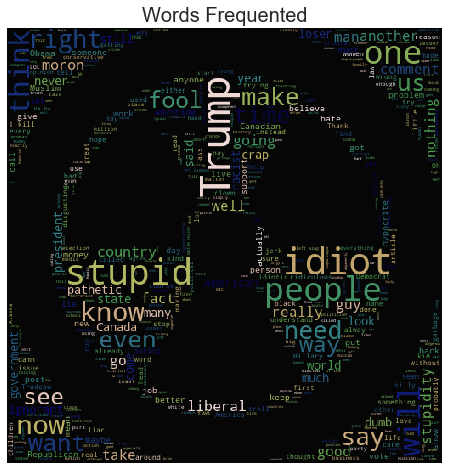

In [150]:
toxicwordcloud(picture = "./imagesforkernal/toxic-sign.png")

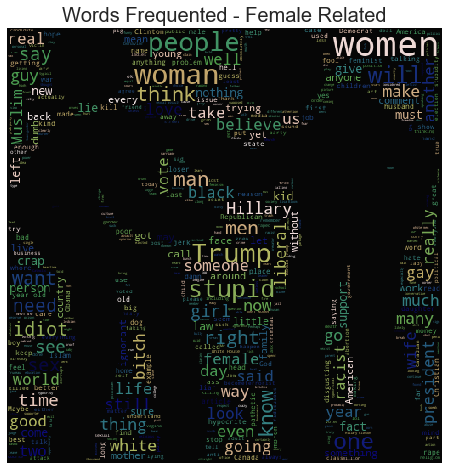

In [152]:
# 여성과 관련된 독성이 0.8 이상인 댓글

toxicwordcloud(subset = train[(train['female'] >0)&(train['target']>0.8)],title = "Words Frequented - Female Related", picture = "./imagesforkernal/anger.png")

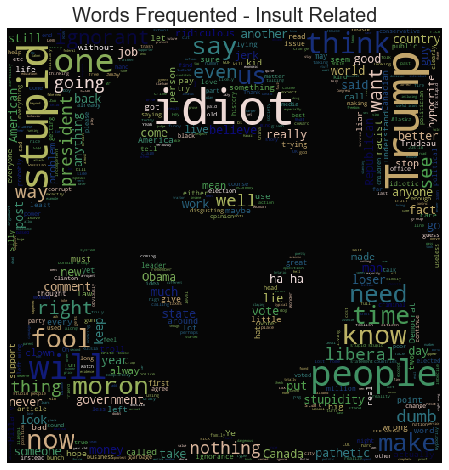

In [154]:
# 모욕과 관련된 독성 0.8 이상 댓글

toxicwordcloud(subset = train[(train['insult'] >0.8)&(train['target']>0.8)],title = "Words Frequented - Insult Related", picture = "./imagesforkernal/biohazard-symbol.png")